In [138]:
import numpy as np
import pandas as pd
import stan
import simulate
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [212]:
def shuffle_Binomial():
    """Shuffling bionomial number"""
    data_bionom = np.concatenate([np.ones(21), np.zeros(21)]).astype(int)
    np.random.shuffle(data_bionom)
    
    return data_bionom

In [213]:
task_design = simulate.genertae_task_act_stim(isActFirst=True)

In [218]:
dataSes1Run1ActStim = task_design[(task_design['session']==1)&(task_design['run']==2)&(task_design['block']=='Act')]

In [96]:
# reading the RL model span
file_name = 'models/RL_W.stan' 
file_read = open(file_name, 'r')
stan_model = file_read.read()

# reading the observed data
session = 1
subName = 'sub-076'

#set inistial data for molde span
data = {'N':int(dataSes1Run1ActStim.shape[0]),     
         'pushed':dataSes1Run1ActStim.pushCorrect.to_numpy().astype(int),  
         'yellowChosen':dataSes1Run1ActStim.yellowCorrect.to_numpy().astype(int), 
         'winAmtPushable':dataSes1Run1ActStim.winAmtPushable.to_numpy().astype(int), 
         'winAmtYellow':dataSes1Run1ActStim.winAmtYellow.to_numpy().astype(int), 
         'rewarded':dataSes1Run1ActStim.pushCorrect.to_numpy().astype(int), 
         'p_push_init':.5, 
         'p_yell_init':.5}

In [97]:
firstCond = dataSes1Run1ActStim.stimActFirst.to_numpy()[0]

resAct = dataSes1Run1ActStim.pushCorrect.to_numpy()
pushed = np.where(resAct==1)[0] + 1
pulled = np.where(resAct==0)[0] + 1
noRes  = np.where(resAct < 0)[0] + 1

corrAct= dataSes1Run1ActStim.pushCorrect.to_numpy()
pushCorr = np.where(corrAct==1)[0] + 1
pulledCorr = np.where(corrAct==0)[0] + 1


pltData = ({'label': ['pushed', 'push correct', 'no response', 'pull correct', 'pulled'],
            'choise': [pushed, pushCorr, noRes, pulledCorr, pulled]})
dfPlot = pd.DataFrame(pltData)

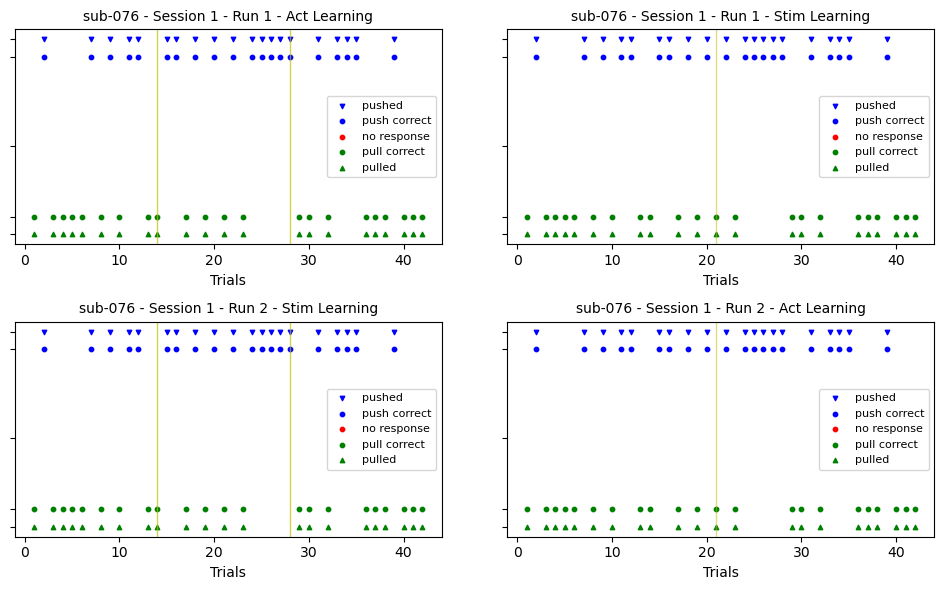

In [98]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)

columns = 2
rows = 2

y = [3.2 ,3, 2 , 1.2, 1] 
markers = ['v', 'o', 'o' , 'o', '^']
colors =['blue','blue', 'red', 'green', 'green']

if (firstCond == 'Act' and session == 1) or (firstCond == 'Stim' and session == 2):
    titles = [subName + ' - Session ' + str(session) + ' - Run 1 - Act Learning', 
              subName + ' - Session ' + str(session) + ' - Run 1 - Stim Learning' ,
              subName + ' - Session ' + str(session) + ' - Run 2 - Stim Learning',
              subName + ' - Session ' + str(session) + ' - Run 2 - Act Learning']
elif (firstCond == 'Stim' and session == 1) or (firstCond == 'Act' and session == 2):
    titles = [subName + ' - Session ' + str(session) + ' - Run 1 - Stim Learning', 
              subName + ' - Session ' + str(session) + ' - Run 1 - Act Learning' ,
              subName + ' - Session ' + str(session) + ' - Run 2 - Act Learning',
              subName + ' - Session ' + str(session) + ' - Run 2 - Stim Learning']


#for idx in range(columns*rows):
for idx in range(1):
    fig.add_subplot(rows, columns, 1)
    #create a list of y coordinates for every x coordinate
    for i in range(len(dfPlot)):
        plt.scatter(dfPlot.choise[i],[y[i] for j in range(len(dfPlot.choise[i]))], 
                    s=10, c=colors[i], marker=markers[i])


    plt.yticks(y,[]) #show the empy y axis label
    plt.legend(dfPlot.label, fontsize=8)
    plt.xlabel('Trials', fontsize=10)
    plt.title(titles[idx], fontsize=10)
    
    if idx%2==1:
        plt.axvline(x = 21, color='y', linewidth=1, alpha=.5)
    else:
        plt.axvline(x = 14, color='y', linewidth=1, alpha=.7)
        plt.axvline(x = 28, color='y', linewidth=1, alpha=.7)

plt.subplots_adjust(wspace=10.)
plt.show()

# fig.savefig('out.png', dpi=300)

In [99]:
#import nest_asyncio
#nest_asyncio.apply()

In [100]:
posterior = stan.build(stan_model, data = data)

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_m2lzkw5h/model_6y2g4c2b.stan', line 7, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_m2lzkw5h/model_6y2g4c2b.stan', line 8, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_m2lzkw5h/model_6y2g4c2b.stan', line 9, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format

In [101]:
fit = posterior.sample(num_chains=1000, num_samples=100)

Sampling:   0%
Sampling:   0% (1100/1100000)
Sampling:   0% (2200/1100000)
Sampling:   0% (3300/1100000)
Sampling:   0% (4400/1100000)
Sampling:   0% (5500/1100000)
Sampling:   1% (6600/1100000)
Sampling:   1% (7700/1100000)
Sampling:   1% (8800/1100000)
Sampling:   1% (9900/1100000)
Sampling:   1% (11000/1100000)
Sampling:   1% (12100/1100000)
Sampling:   1% (13200/1100000)
Sampling:   1% (14300/1100000)
Sampling:   1% (15400/1100000)
Sampling:   2% (16500/1100000)
Sampling:   2% (17600/1100000)
Sampling:   2% (18700/1100000)
Sampling:   2% (19800/1100000)
Sampling:   2% (20900/1100000)
Sampling:   2% (22000/1100000)
Sampling:   2% (23100/1100000)
Sampling:   2% (24200/1100000)
Sampling:   2% (25300/1100000)
Sampling:   2% (26400/1100000)
Sampling:   2% (27500/1100000)
Sampling:   3% (28600/1100000)
Sampling:   3% (29700/1100000)
Sampling:   3% (30800/1100000)
Sampling:   3% (31900/1100000)
Sampling:   3% (33000/1100000)
Sampling:   3% (34100/1100000)
Sampling:   3% (35200/1100000)
Sa

Sampling:  17% (187000/1100000)
Sampling:  17% (188100/1100000)
Sampling:  17% (189200/1100000)
Sampling:  17% (190300/1100000)
Sampling:  17% (191400/1100000)
Sampling:  18% (192500/1100000)
Sampling:  18% (193600/1100000)
Sampling:  18% (194700/1100000)
Sampling:  18% (195800/1100000)
Sampling:  18% (196900/1100000)
Sampling:  18% (198000/1100000)
Sampling:  18% (199100/1100000)
Sampling:  18% (200200/1100000)
Sampling:  18% (201300/1100000)
Sampling:  18% (202400/1100000)
Sampling:  18% (203500/1100000)
Sampling:  19% (204600/1100000)
Sampling:  19% (205700/1100000)
Sampling:  19% (206800/1100000)
Sampling:  19% (207900/1100000)
Sampling:  19% (209000/1100000)
Sampling:  19% (210100/1100000)
Sampling:  19% (211200/1100000)
Sampling:  19% (212300/1100000)
Sampling:  19% (213400/1100000)
Sampling:  20% (214500/1100000)
Sampling:  20% (215600/1100000)
Sampling:  20% (216700/1100000)
Sampling:  20% (217800/1100000)
Sampling:  20% (218900/1100000)
Sampling:  20% (220000/1100000)
Sampling

Sampling:  34% (371800/1100000)
Sampling:  34% (372900/1100000)
Sampling:  34% (374000/1100000)
Sampling:  34% (375100/1100000)
Sampling:  34% (376200/1100000)
Sampling:  34% (377300/1100000)
Sampling:  34% (378400/1100000)
Sampling:  34% (379500/1100000)
Sampling:  35% (380600/1100000)
Sampling:  35% (381700/1100000)
Sampling:  35% (382800/1100000)
Sampling:  35% (383900/1100000)
Sampling:  35% (385000/1100000)
Sampling:  35% (386100/1100000)
Sampling:  35% (387200/1100000)
Sampling:  35% (388300/1100000)
Sampling:  35% (389400/1100000)
Sampling:  36% (390500/1100000)
Sampling:  36% (391600/1100000)
Sampling:  36% (392700/1100000)
Sampling:  36% (393800/1100000)
Sampling:  36% (394900/1100000)
Sampling:  36% (396000/1100000)
Sampling:  36% (397100/1100000)
Sampling:  36% (398200/1100000)
Sampling:  36% (399300/1100000)
Sampling:  36% (400400/1100000)
Sampling:  36% (401500/1100000)
Sampling:  37% (402600/1100000)
Sampling:  37% (403700/1100000)
Sampling:  37% (404800/1100000)
Sampling

Sampling:  51% (556600/1100000)
Sampling:  51% (557700/1100000)
Sampling:  51% (558800/1100000)
Sampling:  51% (559900/1100000)
Sampling:  51% (561000/1100000)
Sampling:  51% (562100/1100000)
Sampling:  51% (563200/1100000)
Sampling:  51% (564300/1100000)
Sampling:  51% (565400/1100000)
Sampling:  52% (566500/1100000)
Sampling:  52% (567600/1100000)
Sampling:  52% (568700/1100000)
Sampling:  52% (569800/1100000)
Sampling:  52% (570900/1100000)
Sampling:  52% (572000/1100000)
Sampling:  52% (573100/1100000)
Sampling:  52% (574200/1100000)
Sampling:  52% (575300/1100000)
Sampling:  52% (576400/1100000)
Sampling:  52% (577500/1100000)
Sampling:  53% (578600/1100000)
Sampling:  53% (579700/1100000)
Sampling:  53% (580800/1100000)
Sampling:  53% (581900/1100000)
Sampling:  53% (583000/1100000)
Sampling:  53% (584100/1100000)
Sampling:  53% (585200/1100000)
Sampling:  53% (586300/1100000)
Sampling:  53% (587400/1100000)
Sampling:  54% (588500/1100000)
Sampling:  54% (589600/1100000)
Sampling

Sampling:  67% (741400/1100000)
Sampling:  68% (742500/1100000)
Sampling:  68% (743600/1100000)
Sampling:  68% (744700/1100000)
Sampling:  68% (745800/1100000)
Sampling:  68% (746900/1100000)
Sampling:  68% (748000/1100000)
Sampling:  68% (749100/1100000)
Sampling:  68% (750200/1100000)
Sampling:  68% (751300/1100000)
Sampling:  68% (752400/1100000)
Sampling:  68% (753500/1100000)
Sampling:  69% (754600/1100000)
Sampling:  69% (755700/1100000)
Sampling:  69% (756800/1100000)
Sampling:  69% (757900/1100000)
Sampling:  69% (759000/1100000)
Sampling:  69% (760100/1100000)
Sampling:  69% (761200/1100000)
Sampling:  69% (762300/1100000)
Sampling:  69% (763400/1100000)
Sampling:  70% (764500/1100000)
Sampling:  70% (765600/1100000)
Sampling:  70% (766700/1100000)
Sampling:  70% (767800/1100000)
Sampling:  70% (768900/1100000)
Sampling:  70% (770000/1100000)
Sampling:  70% (771100/1100000)
Sampling:  70% (772200/1100000)
Sampling:  70% (773300/1100000)
Sampling:  70% (774400/1100000)
Sampling

Sampling:  84% (926200/1100000)
Sampling:  84% (927300/1100000)
Sampling:  84% (928400/1100000)
Sampling:  84% (929500/1100000)
Sampling:  85% (930600/1100000)
Sampling:  85% (931700/1100000)
Sampling:  85% (932800/1100000)
Sampling:  85% (933900/1100000)
Sampling:  85% (935000/1100000)
Sampling:  85% (936100/1100000)
Sampling:  85% (937200/1100000)
Sampling:  85% (938300/1100000)
Sampling:  85% (939400/1100000)
Sampling:  86% (940500/1100000)
Sampling:  86% (941600/1100000)
Sampling:  86% (942700/1100000)
Sampling:  86% (943800/1100000)
Sampling:  86% (944900/1100000)
Sampling:  86% (946000/1100000)
Sampling:  86% (947100/1100000)
Sampling:  86% (948200/1100000)
Sampling:  86% (949300/1100000)
Sampling:  86% (950400/1100000)
Sampling:  86% (951500/1100000)
Sampling:  87% (952600/1100000)
Sampling:  87% (953700/1100000)
Sampling:  87% (954800/1100000)
Sampling:  87% (955900/1100000)
Sampling:  87% (957000/1100000)
Sampling:  87% (958100/1100000)
Sampling:  87% (959200/1100000)
Sampling

    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 

    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 

  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained 

  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sp

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is abou

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampl

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 0.000151 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.51 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occur

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning oc

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this wa

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be re

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sp

    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrai

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is ab

    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the s

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. n

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  b

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probabil

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. n

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. n

    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 8.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis pro

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 10

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this wa

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial v

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sp

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. n

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interv

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probabil

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fin

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs

    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrai

    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions u

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message:

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metrop

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient 

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sp

    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 

  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is ab

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposa

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.7e-05 seconds
  1000 transitions using 10 lea

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metrop

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. n

    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interv

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 6.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposa

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. n

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metrop

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to colu

  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is ab

  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sp

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sp

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.36 s

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probabil

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampl

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3.5e-05 seconds


  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probabil

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 8.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.87 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variabl

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metrop

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accor

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. n

    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 8.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.87 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropo

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposa

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropol

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probabilit

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposa

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the s

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this wa

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sp

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. n

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 4.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be re

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient 

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. n

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metrop

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to colu

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random vari

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient 

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial valu

    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is ab

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3.8e-05 seconds


  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probabil

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 10

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposa

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initi

    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interv

    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (i

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient 

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation to

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metrop

    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely il

    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interv

    Stan can't start sampling from this initial value.
  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 lea

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3.4e-05 seconds


  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: R

    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 6.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.63 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely il

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. n

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposa

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this wa

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  

  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this wa

    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 0.000164 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.64 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metrop

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning oc

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often th

  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in

  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is ab

    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  E

    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Rejecting initial value:
    Log probability evaluates to log(0), i.e. negative infinity.
    Stan can't start sampling from this initial value.
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if th

  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sp

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrain

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 5.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  b

  Gradient evaluation took 5.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 100, column 4 to column 32)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sp

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/htt

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: bernoulli_lpmf: Probability parameter is -nan, but must be in the interval [0, 1] (in '/tmp/httpstan_llkxrrwd/model_6y2g4c2b.stan', line 104, column 8 to column 50)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


In [102]:
alphaAct_ = fit["alphaAct_"] 
alphaStim_ = fit["alphaStim_"] 
weightAct_ = fit["weightAct_"] 
beta_ = fit["beta_"] 

#### Action Learning

Text(0.5, 1.0, 'Weightening')

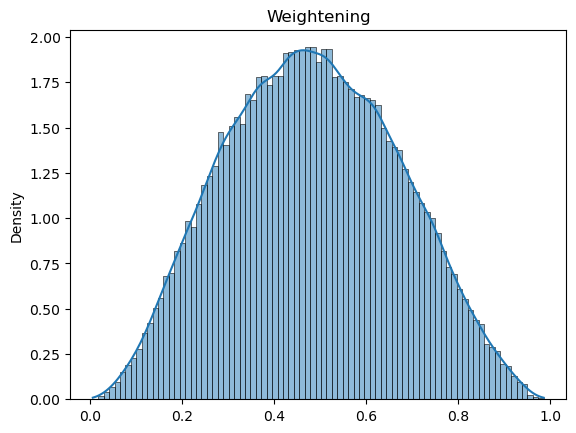

In [103]:
sns.histplot(weightAct_[0], kde=True, stat='density')
plt.title('Weightening')

Text(0.5, 1.0, 'Sensitivity')

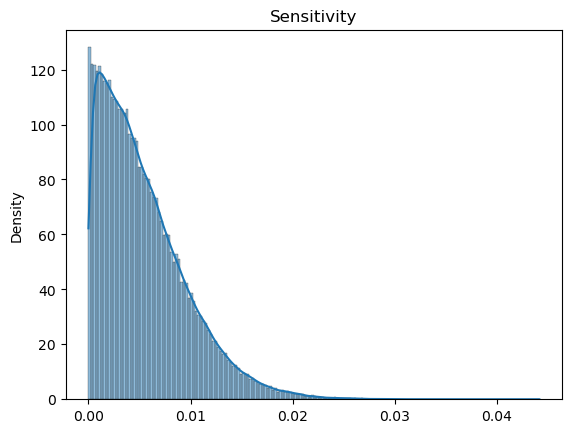

In [104]:
sns.histplot(beta_[0], kde=True, stat='density')
plt.title('Sensitivity')

In [105]:
az.summary(fit)

/mrhome/amingk/anaconda3/lib/python3.10/site-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (100). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alphaAct_,0.494,0.192,0.138,0.834,0.001,0.000,96466.0,69132.0,1.01
alphaStim_,0.481,0.189,0.133,0.820,0.001,0.000,96253.0,71657.0,1.01
weightAct_,0.483,0.187,0.144,0.821,0.001,0.000,96210.0,71783.0,1.01
beta_,0.005,0.004,0.000,0.013,0.000,0.000,62189.0,37177.0,1.01
p_push,1.000,0.005,1.000,1.000,0.000,0.000,94810.0,69132.0,1.00
p_pull,0.000,0.005,0.000,0.000,0.000,0.000,95617.0,69132.0,1.00
p_yell,0.397,0.101,0.209,0.569,0.000,0.000,96704.0,72403.0,1.01
p_blue,0.603,0.101,0.431,0.791,0.000,0.000,96704.0,72403.0,1.01
EV_push,24.991,0.127,24.998,25.000,0.001,0.000,94811.0,69132.0,1.00
EV_pull,0.028,0.380,0.000,0.005,0.002,0.001,95617.0,69132.0,1.00


#### Stimulus Learning

Text(0.5, 1.0, 'Weightening')

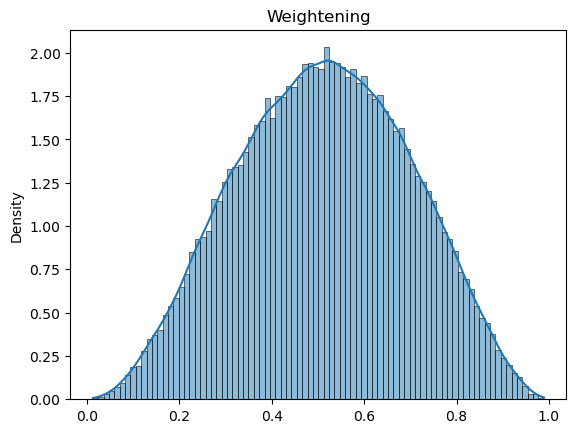

In [66]:
sns.histplot(weightAct_[0], kde=True, stat='density')
plt.title('Weightening')

Text(0.5, 1.0, 'Sensitivity')

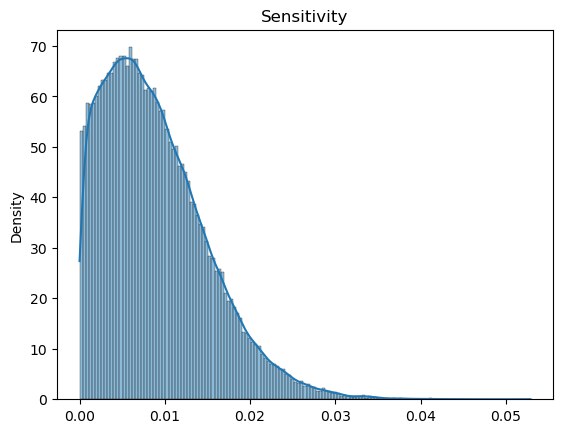

In [67]:
sns.histplot(beta_[0], kde=True, stat='density')
plt.title('Sensitivity')

In [68]:
az.summary(fit)

/mrhome/amingk/anaconda3/lib/python3.10/site-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (100). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alphaAct_,0.513,0.187,0.169,0.849,0.001,0.000,94278.0,69103.0,1.01
alphaStim_,0.477,0.192,0.131,0.824,0.001,0.000,93551.0,69730.0,1.01
weightAct_,0.513,0.185,0.173,0.845,0.001,0.000,94960.0,70325.0,1.01
beta_,0.009,0.006,0.000,0.020,0.000,0.000,59726.0,35593.0,1.01
p_push,1.000,0.005,1.000,1.000,0.000,0.000,93654.0,71708.0,1.00
p_pull,0.000,0.005,0.000,0.000,0.000,0.000,94340.0,71708.0,1.00
p_yell,0.536,0.141,0.333,0.786,0.000,0.000,94827.0,75289.0,1.01
p_blue,0.464,0.141,0.214,0.667,0.000,0.000,94827.0,75289.0,1.01
EV_push,98.972,0.527,98.998,99.000,0.002,0.002,93655.0,71708.0,1.00
EV_pull,0.000,0.005,0.000,0.000,0.000,0.000,94340.0,71708.0,1.00
